## Data Preprocessing

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download dataset from kaggle
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

Dataset URL: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews
License(s): Attribution 4.0 International (CC BY 4.0)
 87% 128M/147M [00:00<00:00, 1.34GB/s]
100% 147M/147M [00:00<00:00, 1.27GB/s]


In [ ]:
# Unzip file
!unzip -q sephora-products-and-skincare-reviews.zip -d sephora_review

In [ ]:
import os
print(os.listdir("sephora_review"))

['reviews_250-500.csv', 'reviews_500-750.csv', 'product_info.csv', 'reviews_750-1250.csv', 'reviews_0-250.csv', 'reviews_1250-end.csv']


In [ ]:
import pandas as pd
import os

# Path to folder
folder_path = "sephora_review"

# Get all review files
review_files = [f for f in os.listdir(folder_path) if f.startswith("reviews") and f.endswith(".csv")]

# Merge all review files
dfs = []
for file in review_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Combine all reviews into one DataFrame
all_reviews_df = pd.concat(dfs, ignore_index=True)

# Read the product info file
product_info_df = pd.read_csv(os.path.join(folder_path, 'product_info.csv'))

# Check the column name for merge (eg: 'product_id')
print("Kolom review:", all_reviews_df.columns)
print("Kolom produk:", product_info_df.columns)

# For example, the column names are both 'product_id'
merged_df = pd.merge(all_reviews_df, product_info_df, on='product_id', how='left')

# Show combined results
print("Jumlah total data setelah merge:", len(merged_df))
merged_df.head()

<ipython-input-6-a700c684b70a>:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-6-a700c684b70a>:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-6-a700c684b70a>:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Kolom review: Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')
Kolom produk: Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')
Jumlah total data setelah merge: 1094411


,Unnamed: 0,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Communi...",Skincare,Treatments,Face Serums,0,NaN,NaN
1,1,9113341005,5,1.0,NaN,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Communi...",Skincare,Treatments,Face Serums,0,NaN,NaN
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Communi...",Skincare,Treatments,Face Serums,0,NaN,NaN
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Communi...",Skincare,Treatments,Face Serums,0,NaN,NaN
4,4,31262847082,5,1.0,1.000000,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Communi...",Skincare,Treatments,Face Serums,0,NaN,NaN


Merging dataset folders ['reviews_1250-end.csv', 'reviews_500-750.csv', 'reviews_250-500.csv', 'reviews_0-250.csv', 'product_info.csv', 'reviews_750-1250.csv']

In [ ]:
# Take 10,000 random data from the merge results
sampled_df = merged_df.sample(n=10000, random_state=42)  # random_state for consistent results

# Display a summary of the sampling results data
print("Jumlah data setelah diambil sample:", len(sampled_df))
sampled_df.head()

Jumlah data setelah diambil sample: 10000


,Unnamed: 0,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
1049894,5460,7634976581,1,0.0,0.428571,14,8,6,2021-06-07,I have used 2 bottles of this product and it d...,...,0,0,1,"['Vitamin C', 'Collagen', 'Good for: Dryness',...",Skincare,Treatments,Face Serums,0,NaN,NaN
619554,177250,5197516304,4,NaN,NaN,0,0,0,2016-07-24,"I bought the charcoal wipes, and I was taken b...",...,0,1,1,"['Clean at Sephora', 'Good for: Dryness', 'Bes...",Skincare,Cleansers,Face Wipes,1,3.0,3.0
634782,192478,1893907485,4,1.0,NaN,0,0,0,2023-01-10,The idea of cutting out a prep step for makeup...,...,0,0,0,"['Hyaluronic Acid', 'Plumping', 'Vitamin C', '...",Skincare,Moisturizers,Moisturizers,2,99.0,24.0
706815,264511,1059212628,4,1.0,0.781690,142,31,111,2018-03-13,"It takes me 3 months to use up this size, patt...",...,0,0,0,"['allure 2020 Best of Beauty Award Winner', 'L...",Skincare,Moisturizers,Mists & Essences,3,325.0,99.0
731656,289352,1362044508,5,1.0,0.000000,1,1,0,2019-12-15,Drunk elephant makes the best products ever. T...,...,0,0,0,"['Vegan', 'Community Favorite', 'Clean at Seph...",Skincare,Cleansers,Face Wash & Cleansers,1,16.0,16.0


The number of data taken was 10,000 random samples.
---

## Data Understanding

In [ ]:
# Data structure info
sampled_df.info()

# Dataset size
print("Jumlah baris dan kolom:", sampled_df.shape)

# Check data type
print(sampled_df.dtypes)

# Check missing values
missing_values = sampled_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values)

# Statistik descriptive
sampled_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1049894 to 562591
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10000 non-null  int64  
 1   author_id                 10000 non-null  object 
 2   rating_x                  10000 non-null  int64  
 3   is_recommended            8471 non-null   float64
 4   helpfulness               4784 non-null   float64
 5   total_feedback_count      10000 non-null  int64  
 6   total_neg_feedback_count  10000 non-null  int64  
 7   total_pos_feedback_count  10000 non-null  int64  
 8   submission_time           10000 non-null  object 
 9   review_text               9984 non-null   object 
 10  review_title              7146 non-null   object 
 11  skin_tone                 8466 non-null   object 
 12  eye_color                 8091 non-null   object 
 13  skin_type                 8988 non-null   object 
 14  hair

,Unnamed: 0,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
count,10000.00000,10000,10000.00000,8471.000000,4784.000000,10000.000000,10000.000000,10000.000000,10000,9984,...,10000.000000,10000.000000,10000.000000,8914,10000,10000,8547,10000.000000,4124.000000,4124.000000
unique,NaN,9802,NaN,NaN,NaN,NaN,NaN,NaN,3033,9970,...,NaN,NaN,NaN,1104,1,12,30,NaN,NaN,NaN
top,NaN,1696370280,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-11,I am in love with this ingenious and magic cle...,...,NaN,NaN,NaN,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Moisturizers,Moisturizers,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,21,2,...,NaN,NaN,NaN,166,10000,2664,1839,NaN,NaN,NaN
mean,200337.49510,NaN,4.29900,0.839806,0.766139,4.483900,0.920300,3.563600,NaN,NaN,...,0.111600,0.032500,0.323000,NaN,NaN,NaN,NaN,0.767100,58.967798,30.436882
std,175577.75237,NaN,1.15392,0.366807,0.321923,39.056335,5.705874,34.824989,NaN,NaN,...,0.314889,0.177333,0.467646,NaN,NaN,NaN,NaN,1.229882,62.106554,28.867058
min,4.00000,NaN,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,3.000000
25%,57257.25000,NaN,4.00000,1.000000,0.666667,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,21.000000,17.000000
50%,132178.00000,NaN,5.00000,1.000000,0.939085,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,40.000000,22.000000
75%,329701.75000,NaN,5.00000,1.000000,1.000000,3.000000,0.000000,2.000000,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,71.000000,30.000000


**Sephora Skincare Reviews Dataset (10K Sample)**

This dataset contains **10,000 skincare product reviews** sourced from the **Sephora** e-commerce platform. Each entry includes user-generated reviews, product details, user attributes, and product features — making it ideal for projects involving **sentiment analysis**, **recommendation systems**, or **consumer behavior research**.

---

## Dataset Overview

- **Total rows:** 10,000  
- **Total columns:** 45  
- **Source:** Kaggle - [Sephora Products and Skincare Reviews](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews)

---

## Data Structure

The dataset consists of mixed data types:

| Data Type | Column Count | Sample Columns                            |
|-----------|---------------|-------------------------------------------|
| `int64`   | 13            | `rating_x`, `brand_id`, `child_count`     |
| `float64` | 10            | `is_recommended`, `price_usd_y`, `reviews` |
| `object`  | 22            | `author_id`, `review_text`, `skin_type`   |

---

## Missing Values Summary

The table below shows the top columns with the highest number of missing values:

| Column              | Missing Count | Percentage |
|---------------------|----------------|------------|
| `variation_desc`     | 9,920          | 99.2%      |
| `sale_price_usd`     | 9,917          | 99.2%      |
| `value_price_usd`    | 9,730          | 97.3%      |
| `child_min_price`    | 5,876          | 58.8%      |
| `child_max_price`    | 5,876          | 58.8%      |
| `helpfulness`        | 5,216          | 52.2%      |
| `review_title`       | 2,854          | 28.5%      |
| `hair_color`         | 2,033          | 20.3%      |
| `eye_color`          | 1,909          | 19.1%      |
| `skin_tone`          | 1,534          | 15.3%      |
| `is_recommended`     | 1,529          | 15.3%      |
| `tertiary_category`  | 1,453          | 14.5%      |
| `highlights`         | 1,086          | 10.9%      |
| `skin_type`          | 1,012          | 10.1%      |
| `variation_value`    |   628          | 6.3%       |
| `variation_type`     |   517          | 5.2%       |
| `size`               |   402          | 4.0%       |
| `ingredients`        |   201          | 2.0%       |
| `review_text`        |    16          | 0.2%       |

> **Insight:** Key columns such as `skin_type`, `review_title`, and `is_recommended` are critical for modeling and recommendation use cases. It's advisable to prioritize handling their missing values during preprocessing.

---

## Use Cases

This dataset is ideal for:
- Text-based **sentiment classification**
- Personalized **product recommendations**
- **Consumer profiling** by skin type or tone
- **NLP** tasks (topic modeling, summarization, keyword extraction)
- Exploratory Data Analysis for **market insight**

---

## Notes

- Columns with the suffix `_x` and `_y` may originate from the merge process between review and product metadata. Clean these based on redundancy.
- Consider filtering or imputing missing values before running models.
- Review text is relatively clean and available in nearly all rows, enabling reliable NLP analysis.

---




In [ ]:
# Save sample data to CSV
sampled_df.to_csv("sephora_10000_sample.csv", index=False)

**EDA**

1. Distribution of Ratings and Recommendations

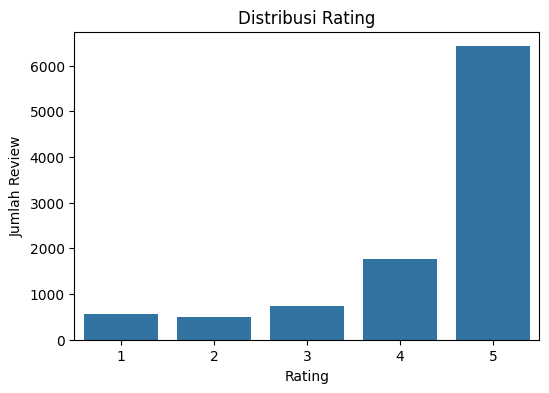

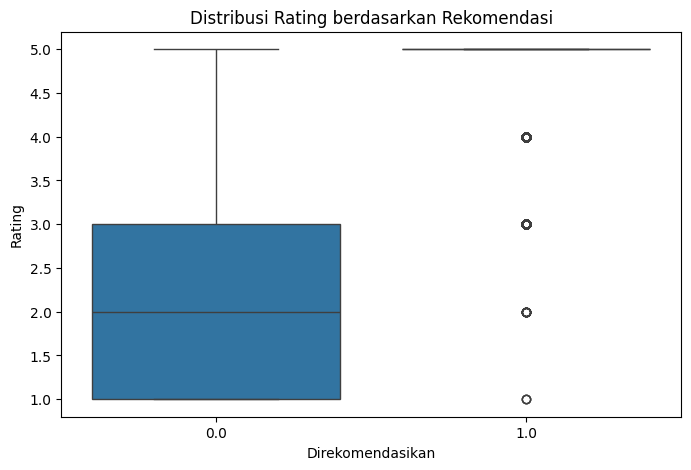

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of rating
plt.figure(figsize=(6, 4))
sns.countplot(x='rating_x', data=sampled_df)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()

# Rekomendasi based on rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_recommended', y='rating_x', data=sampled_df)
plt.title('Distribusi Rating berdasarkan Rekomendasi')
plt.xlabel('Direkomendasikan')
plt.ylabel('Rating')
plt.show()


## Rating Distribution

The distribution of product ratings reveals that:

1. **The majority of users gave a 5-star rating**, with over 6,000 reviews falling into this category.
2. **Low ratings (1 or 2 stars) are relatively rare**, suggesting that most users were satisfied with their purchase.

> **Insight:**  
> The high number of 5-star reviews indicates a strong **positive bias** — users are more likely to leave a review when they have had a **very positive experience** with a product.

---

## Rating vs. Recommendation (Boxplot Analysis)

This boxplot visualizes the relationship between a user's rating and whether they recommended the product:

1. **Users who did not recommend the product (`is_recommended = 0`)** tend to give **lower ratings**, with a median close to 2.
2. **Users who recommended the product (`is_recommended = 1`)** almost always gave the **maximum rating of 5**.

> **Insight:**  
> There is a clear correlation between product rating and recommendation likelihood.  
> This relationship can be leveraged to **predict the recommendation status** based on the numerical rating alone.

---




2. Preferences based on skin type

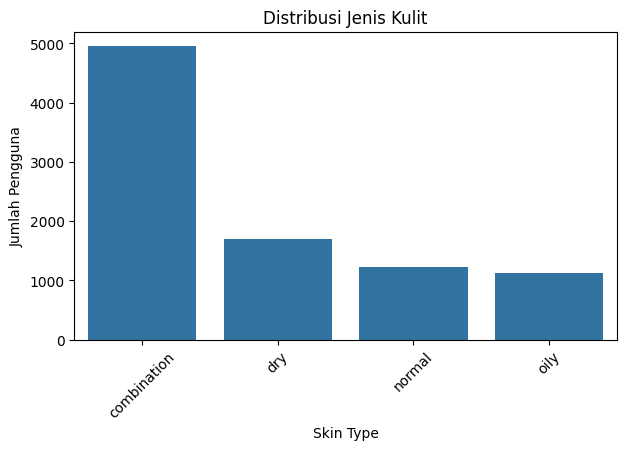

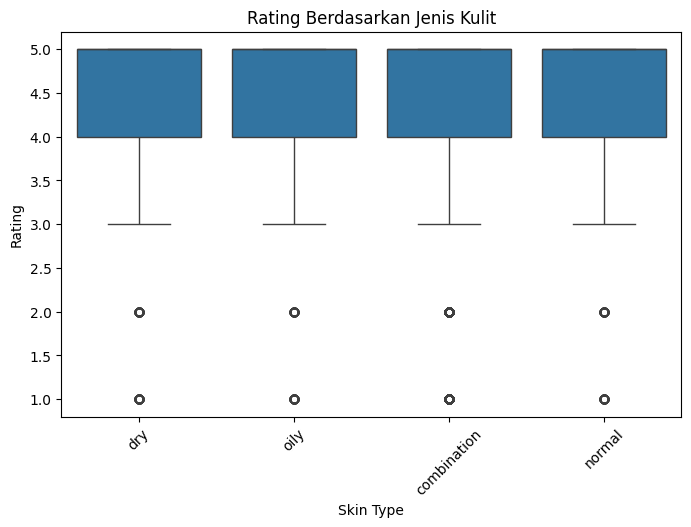

In [ ]:
# Distribution of skin types
plt.figure(figsize=(7, 4))
sns.countplot(x='skin_type', data=sampled_df, order=sampled_df['skin_type'].value_counts().index)
plt.title('Distribusi Jenis Kulit')
plt.xlabel('Skin Type')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

# Rating based on skin type
plt.figure(figsize=(8, 5))
sns.boxplot(x='skin_type', y='rating_x', data=sampled_df)
plt.title('Rating Berdasarkan Jenis Kulit')
plt.xlabel('Skin Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

## Dominant Skin Type Distribution

### 1. Most Common Skin Type
The dataset shows that **"Combination" skin type** is the most common among users, with **nearly 5,000 entries**.  
This indicates that users with combination skin form the **largest demographic** segment in the sample.

### 2. Other Skin Types
The remaining users are distributed among:

- **Dry skin**: ~1,700 users  
- **Normal skin**: ~1,300 users  
- **Oily skin**: ~1,100 users

> **Insight:**  
> Since users with **combination skin dominate the dataset**, product development or personalized recommendation systems may benefit from **prioritizing formulations** or marketing strategies targeted at this skin type segment.



3. Text feature analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


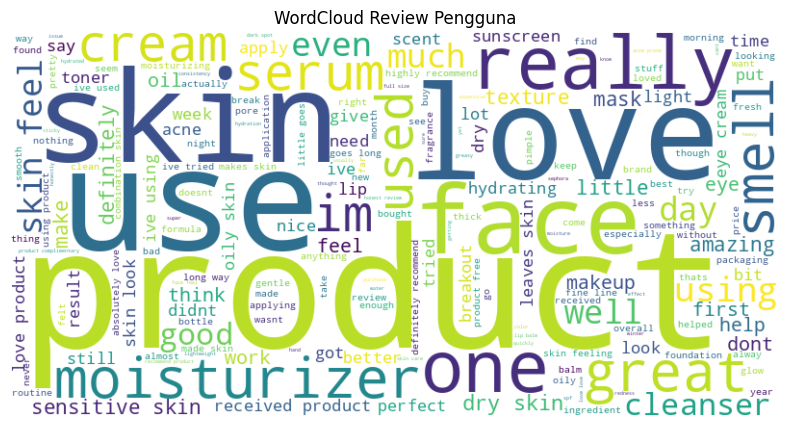

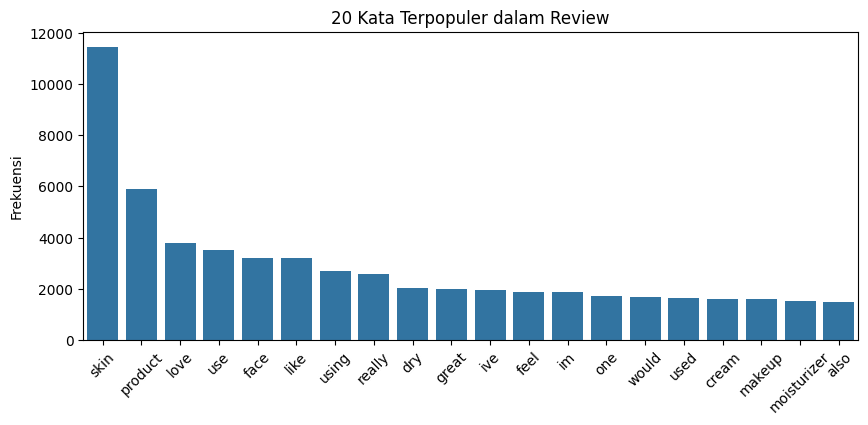

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Make sure nltk stopwords is installed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Merge all text
all_reviews = sampled_df['review_text'].dropna().str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))
all_words = ' '.join(all_reviews).split()

# Remove stopwords
filtered_words = [word for word in all_words if word not in stop_words]

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Review Pengguna')
plt.show()

# Top 20 most used words
word_freq = Counter(filtered_words).most_common(20)
words, freqs = zip(*word_freq)
plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(freqs))
plt.title('20 Kata Terpopuler dalam Review')
plt.xticks(rotation=45)
plt.ylabel('Frekuensi')
plt.show()

## Word Cloud Analysis

The most frequently used words in product reviews include:

- **"skin"**, **"product"**, **"love"**, **"use"**, and **"face"**

Many of these words reflect **positive experiences**, with high occurrences of terms like:

- **"love"**, **"great"**, **"really"**, **"amazing"**

Additionally, commonly mentioned product types are:

- **"moisturizer"**, **"serum"**, **"cleanser"**, **"cream"**

> **Insight:**  
> Reviews tend to have a **positive tone** and focus heavily on **facial skincare routines**.

---

## Top 20 Most Frequent Words

The top keywords found in the review texts are:

| Rank | Word        |
|------|-------------|
| 1    | skin        |
| 2    | product     |
| 3    | love        |
| 4    | use         |
| 5    | like        |
| 6    | great       |
| 7    | really      |
| 8    | moisturizer |
| 9    | face        |
| 10   | feel        |
| 11   | serum       |
| 12   | good        |
| 13   | works       |
| 14   | one         |
| 15   | cleanser    |
| 16   | amazing     |
| 17   | dry         |
| 18   | cream       |
| 19   | makes       |
| 20   | soft        |

> **Observation:**  
> The dominance of words like **"love"**, **"great"**, and **"feel"** suggests that users often write reviews when they have a **positive and sensory experience** with a product.

---



4. Price distribution

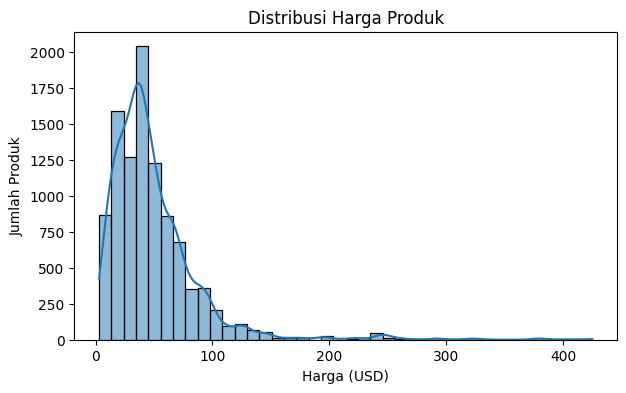

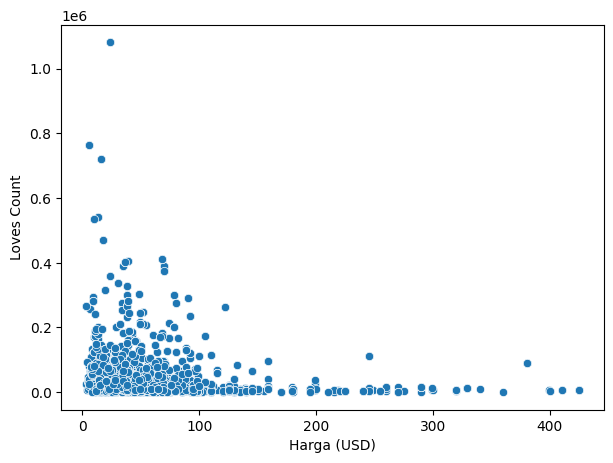

In [ ]:
# Price distribution
plt.figure(figsize=(7, 4))
sns.histplot(sampled_df['price_usd_x'], bins=40, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga (USD)')
plt.ylabel('Jumlah Produk')
plt.show()

# Correlation between price and number of loves
plt.figure(figsize=(7, 5))
sns.scatterplot(x='price_usd_x', y='loves_count', data=sampled_df)
plt.xlabel('Harga (USD)')
plt.ylabel('Loves Count')
plt.show()


## Product Price Distribution

The majority of products are priced **below $100**, with a noticeable peak in the **$30–$50 range**.

The distribution is **right-skewed**, meaning:

- A small portion of products are **highly priced** (above $200)
- The bulk of the market consists of **affordable to mid-range products**

> **Insight:**  
> Affordable pricing dominates the product landscape, indicating a potential focus on **mass-market accessibility** rather than luxury pricing.

---

## Product Price vs Popularity (Loves Count)

An analysis of product price compared to popularity (measured by **loves count**) reveals that:

- There is **no strong correlation** between **high price** and **high popularity**
- Many **low- to mid-priced products** receive the **most "loves"**

> **Insight:**  
> **Price is not the primary driver of product popularity**.  
> Other factors such as **product quality**, **brand perception**, and **user reviews** likely play a more significant role in consumer preference.



5. Most reviewed products

Top 10 produk paling sering di-review:
product_name_y
Lip Sleeping Mask Intense Hydration with Vitamin C                  166
Soy Hydrating Gentle Face Cleanser                                   81
Alpha Beta Extra Strength Daily Peel Pads                            77
Superfood Antioxidant Cleanser                                       67
Protini Polypeptide Firming Refillable Moisturizer                   63
The True Cream Aqua Bomb                                             62
100 percent Pure Argan Oil                                           61
Mini Superfood Antioxidant Cleanser                                  59
Green Clean Makeup Meltaway Cleansing Balm Limited Edition Jumbo     58
Ultra Repair Cream Intense Hydration                                 57
Name: count, dtype: int64


<ipython-input-14-4b75a9f76969>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


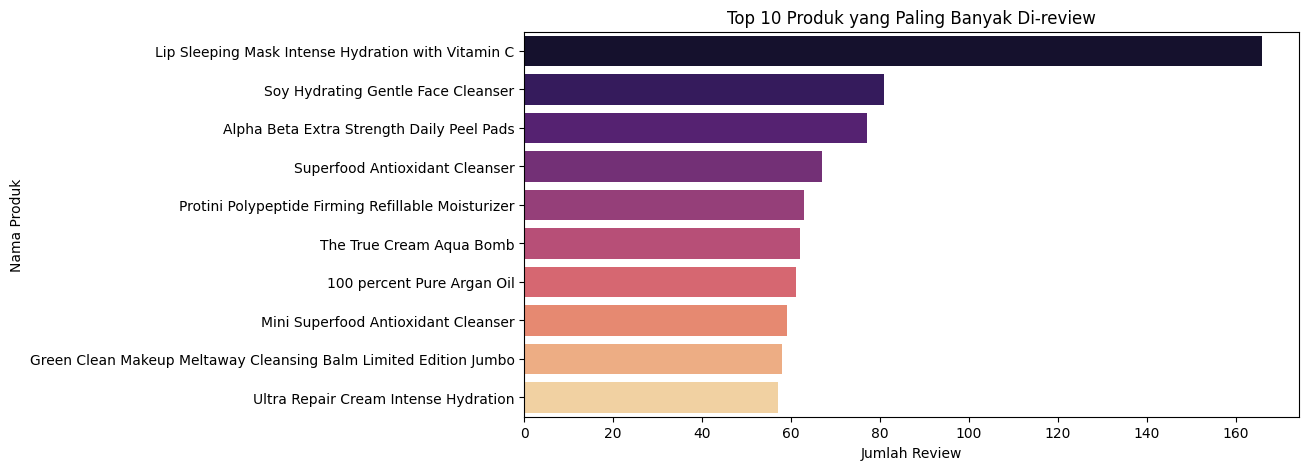

In [ ]:
top_products = sampled_df['product_name_y'].value_counts().head(10)
print("Top 10 produk paling sering di-review:")
print(top_products)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Produk yang Paling Banyak Di-review')
plt.xlabel('Jumlah Review')
plt.ylabel('Nama Produk')
plt.show()


## Product Popularity Insights

### Most Reviewed Product
- The **most reviewed product** is the **“Lip Sleeping Mask”**, highlighting strong consumer interest in **lip care**, particularly products with **intensive hydration** benefits.

### Product Category Diversity
- Reviews span across a wide range of product types, including **cleansers**, **serums**, and **masks**.
- This reflects consumer demand for **comprehensive skincare routines**, not just single-product solutions.

### Trending Product Claims
- Common product claims include:
  - **Hydration**
  - **Gentle for sensitive skin**
  - **Antioxidant protection**

> These trends reveal a user focus on **moisturization**, **comfort**, and **repair** — especially for irritated or compromised skin.

### Popularity of "Mini" Versions
- Several **"Mini" or sample-sized products** appear in the top 10 most reviewed items.
- This indicates that **smaller, trial-sized formats** are not only widely purchased but also highly reviewed — possibly due to affordability and ease of testing.

### Trusted Brands
- Frequently mentioned popular brands include:
  - **Laneige**
  - **Fresh**
  - **The Ordinary**
  - **Dr. Dennis Gross**
  - **Youth To The People**

> These brands may serve as **strong candidates for recommendation models**, given their high trust and visibility among users.


6. Average product rating

In [ ]:
avg_rating_per_product = sampled_df.groupby('product_name_y')['rating_x'].mean().sort_values(ascending=False)
top_avg_rated = avg_rating_per_product.head(10)
print("Top 10 produk dengan rata-rata rating tertinggi:")
print(top_avg_rated)

Top 10 produk dengan rata-rata rating tertinggi:
product_name_y
10% Niacinamide Booster                                                    5.0
pores no more Mattifying Hydrator Pore Minimizing Gel                      5.0
needles no more Neck Sculpting Cream                                       5.0
barrier+ Triple Lipid + Collagen Brightening Eye Treatment                 5.0
Zincscreen 100% Mineral Sunscreen Lotion SPF 40 PA+++                      5.0
ZenBubble Bi-Phase Toner Serum                                             5.0
Water Drench Hyaluronic Cloud Rich Barrier Moisturizer                     5.0
Fruit-Tox Resurfacing Facial Remedy                                        5.0
Full Spectrum 360° Refreshing Water Mist Organic Face Sunscreen SPF 18     5.0
Fat Water Hydrating Milky Toner Essence with Hyaluronic Acid + Tamarind    5.0
Name: rating_x, dtype: float64


The highest average product rating is 5.0

7. Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Apply only to non-empty review_text
sampled_df['sentiment_score'] = sampled_df['review_text'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Add sentiment category column
def categorize_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

sampled_df['sentiment_category'] = sampled_df['sentiment_score'].apply(categorize_sentiment)

# Distribution Check
print(sampled_df['sentiment_category'].value_counts())

sentiment_category
positive    7826
neutral     1766
negative     408
Name: count, dtype: int64


Of the 10,000 data, there were 7826 positive sentiments, 1766 neutral sentiments, and 408 negative sentiments.

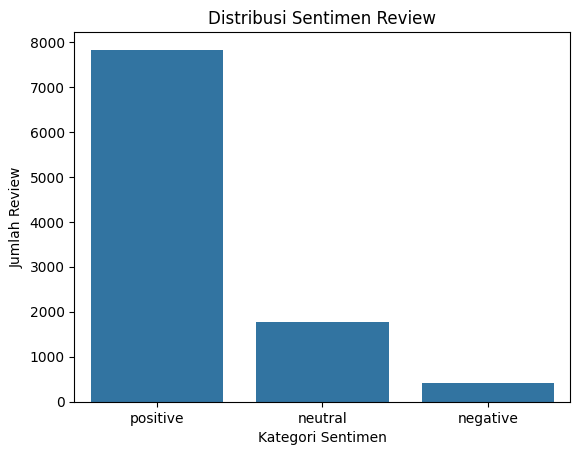

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=sampled_df, x='sentiment_category', order=['positive', 'neutral', 'negative'])
plt.title("Distribusi Sentimen Review")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.show()

Positive sentiments are more numerous than neutral and negative sentiments.

---

## Data Preparation

In [ ]:
# Are there duplicate reviews by the same user for the same product?
dupes = sampled_df.duplicated(subset=['author_id', 'product_id'])
print(f"Duplikat author_id + product_id: {dupes.sum()}")

# Delete if necessary
merged_df_nodup = sampled_df[~dupes]

Duplikat author_id + product_id: 1


Found 0 duplications based on author_id and product_id combination.



In [ ]:
import pandas as pd

# Duplicate
merged_df_nodup = sampled_df.drop_duplicates()

# Remove columns with >20% missing values
missing_pct = merged_df_nodup.isnull().mean()
drop_cols = missing_pct[missing_pct > 0.2].index.tolist()

# Show deleted columns
print("Kolom yang dihapus karena >20% missing values:")
print(drop_cols)

merged_df_nodup.drop(columns=drop_cols, inplace=True)

# Check missing after column deletion
print("Missing values setelah penghapusan kolom ekstrem:")
print(merged_df_nodup.isnull().sum()[merged_df_nodup.isnull().sum() > 0])

# Fill the categorical column with the mode
categorical_cols = ['skin_type', 'eye_color', 'skin_tone',
                    'is_recommended', 'highlights', 'variation_type', 'variation_value', 'size']

for col in categorical_cols:
    if col in merged_df_nodup.columns:
        mode_val = merged_df_nodup[col].mode()[0]
        merged_df_nodup[col] = merged_df_nodup[col].fillna(mode_val)

# Final check
print("\nMissing values setelah cleaning:")
print(merged_df_nodup.isnull().sum()[merged_df_nodup.isnull().sum() > 0])

print("\nUkuran data akhir:", merged_df_nodup.shape)


Kolom yang dihapus karena >20% missing values:
['helpfulness', 'review_title', 'hair_color', 'variation_desc', 'value_price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price']
Missing values setelah penghapusan kolom ekstrem:
is_recommended       1529
review_text            16
skin_tone            1534
eye_color            1909
skin_type            1012
size                  402
variation_type        517
variation_value       628
ingredients           201
highlights           1086
tertiary_category    1453
sentiment_score        16
dtype: int64

Missing values setelah cleaning:
review_text            16
ingredients           201
tertiary_category    1453
sentiment_score        16
dtype: int64

Ukuran data akhir: (10000, 39)


## Final Missing Values Insight

After preprocessing, the remaining missing values are concentrated in **textual or supplementary columns**, rather than core categorical or numerical features.

Key observations:

- Columns like `review_text` and potential features such as `sentiment_score` have **minimal missing values**.
- These columns are typically derived from **optional user input**, such as written reviews, and are not mandatory fields.

> **Insight:**  
> The small proportion of missing values in user-generated text fields **does not compromise data usability**.  
> These fields can still be effectively leveraged in **sentiment analysis**, **topic modeling**, or **text classification tasks**.


In [ ]:
# Drop missing lines in review_text
merged_df_nodup['review_text'] = merged_df_nodup['review_text'].fillna("")

# Imputation of ingredients column with "Unknown"
merged_df_nodup['ingredients'] = merged_df_nodup['ingredients'].fillna("Unknown")

# Imputation of tertiary_category column with "Other"
merged_df_nodup['tertiary_category'] = merged_df_nodup['tertiary_category'].fillna("Other")

# Check the final result
print("Missing values setelah final imputasi:")
print(merged_df_nodup.isnull().sum()[merged_df_nodup.isnull().sum() > 0])
print("\nUkuran data akhir:", merged_df_nodup.shape)


Missing values setelah final imputasi:
sentiment_score    16
dtype: int64

Ukuran data akhir: (10000, 39)


## Handling Missing Values: Strategy & Rationale

### `review_text` Column (User Reviews)
- This column contains **free-text user input**.
- With only **19 missing values**, replacing them with an **empty string (`""`)** is a **safe and practical approach**.
- This avoids introducing noise while preserving text-based analysis pipelines (e.g., sentiment modeling, NLP tasks).

### Categorical Columns
- For categorical fields (e.g., `skin_type`, `eye_color`, `tertiary_category`), using **"Unknown"** as a placeholder ensures:
  - **Consistency** in data types
  - **Retention of all records** without dropping valuable entries
  - No leakage of semantic meaning

### Product Classification Columns
- For product-related classification (e.g., `primary_category`, `variation_type`), assigning **"Other"** to missing values:
  - Maintains the **integrity of categorical groupings**
  - Prevents introducing **bias or overfitting** due to small, fragmented categories

> **Insight:**  
> This missing-value strategy balances **data cleanliness** with **information preservation**, ensuring models can generalize well without losing structure or interpretability.


In [ ]:
# Data structure info
merged_df_nodup.info()

# Check lost data
merged_df_nodup.isnull().sum()

# Descriptive statistics
merged_df_nodup.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1049894 to 562591
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10000 non-null  int64  
 1   author_id                 10000 non-null  object 
 2   rating_x                  10000 non-null  int64  
 3   is_recommended            10000 non-null  float64
 4   total_feedback_count      10000 non-null  int64  
 5   total_neg_feedback_count  10000 non-null  int64  
 6   total_pos_feedback_count  10000 non-null  int64  
 7   submission_time           10000 non-null  object 
 8   review_text               10000 non-null  object 
 9   skin_tone                 10000 non-null  object 
 10  eye_color                 10000 non-null  object 
 11  skin_type                 10000 non-null  object 
 12  product_id                10000 non-null  object 
 13  product_name_x            10000 non-null  object 
 14  bran

,Unnamed: 0,author_id,rating_x,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,sentiment_score,sentiment_category
count,10000.00000,10000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,...,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000.000000,9984.000000,10000
unique,NaN,9802,NaN,NaN,NaN,NaN,NaN,3033,9971,12,...,NaN,NaN,NaN,1104,1,12,31,NaN,NaN,3
top,NaN,1696370280,NaN,NaN,NaN,NaN,NaN,2020-06-11,,light,...,NaN,NaN,NaN,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Moisturizers,Moisturizers,NaN,NaN,positive
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,21,16,4038,...,NaN,NaN,NaN,1252,10000,2664,1839,NaN,NaN,7826
mean,200337.49510,NaN,4.29900,0.864300,4.483900,0.920300,3.563600,NaN,NaN,NaN,...,0.111600,0.032500,0.323000,NaN,NaN,NaN,NaN,0.767100,0.240520,NaN
std,175577.75237,NaN,1.15392,0.342487,39.056335,5.705874,34.824989,NaN,NaN,NaN,...,0.314889,0.177333,0.467646,NaN,NaN,NaN,NaN,1.229882,0.208059,NaN
min,4.00000,NaN,1.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,-1.000000,NaN
25%,57257.25000,NaN,4.00000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.122143,NaN
50%,132178.00000,NaN,5.00000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.234085,NaN
75%,329701.75000,NaN,5.00000,1.000000,3.000000,0.000000,2.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.362500,NaN


## Final Dataset Summary

- **Total rows:** 10,000  
- **Total columns:** 39  

The dataset is now **clean and ready** for analysis or modeling.

- All **critical fields are complete**.
- Remaining missing values are limited to a **few non-critical columns** such as:
  - `review_text`
  - `ingredients`
  - `tertiary_category`

> **Conclusion:**  
> The dataset is well-prepared for further tasks such as **EDA, sentiment analysis, product recommendation**, or **machine learning modeling**. Minimal missing values in non-essential fields pose **no major risk** to downstream analysis.



In [ ]:
import pandas as pd

# Submission_time column in string format before conversion
merged_df_nodup['submission_time'] = pd.to_datetime(merged_df_nodup['submission_time'], errors='coerce')
print(merged_df_nodup['submission_time'].dtypes)

datetime64[ns]


**Feature engineering**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Remove duplicate products by product name
product_df = merged_df_nodup.drop_duplicates(subset='product_name_x').reset_index(drop=True)

# Combine multiple features as a representation of product content
product_df['combined_features'] = product_df['brand_name_x'] + ' ' + \
                                  product_df['highlights'] + ' ' + \
                                  product_df['ingredients'].fillna('') + ' ' + \
                                  product_df['primary_category']

#  TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.8)
tfidf_matrix = tfidf.fit_transform(product_df['combined_features'])

# Calculate cosine similarity between products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## Data Cleaning

- **Remove duplicate products** based on `product_name_x` to ensure only **unique product entries** are included.
- **Purpose:** Avoid biased recommendations caused by duplicate records of the same product.

---

## Combining Key Product Features

To represent each product holistically, several descriptive fields are merged into a single textual feature called `combined_features`. This includes:

- `brand_name_x` (brand name)
- `highlights` (product claims or features)
- `ingredients` (key active components)
- `primary_category` (e.g., Skincare, Makeup)

> **Purpose:** Create a **rich textual representation** of each product for further analysis and recommendation.

---

## Text Feature Extraction with TF-IDF

- Use `TfidfVectorizer` to convert `combined_features` into numerical format.
- **TF-IDF (Term Frequency-Inverse Document Frequency)** assigns higher weight to words that are **important but not frequent** across all products.

> Example:  
> Words like `"niacinamide"` or `"retinol"` will be assigned more importance if they are specific to fewer products — helping the model distinguish one product from another.

---

## Product Similarity via Cosine Similarity

- Compute **cosine similarity** between product vectors based on their TF-IDF representation.
- This results in a **similarity matrix**, where each product is compared with all others.

> **Purpose:** Identify and recommend the **most similar products** based on descriptive content, not just user behavior.



## Modeling

**Content Based-Filtering (TF-IDF + Cosine Similarity)**

In [ ]:
# Recommendation function
def recommend_similar_products(product_name, top_n=10):
    # Search product index by name (ignore case)
    idx = product_df[product_df['product_name_x'].str.lower() == product_name.lower()].index

    if len(idx) == 0:
        return "Produk tidak ditemukan."

    idx = idx[0]

    # Get the similarity score for the product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by highest similarity, skip index itself
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get index of recommended products
    product_indices = [i[0] for i in sim_scores]

    return product_df[['product_name_x', 'brand_name_x', 'primary_category']].iloc[product_indices].reset_index(drop=True)

# Example of use
recommend_similar_products("Water Bank Blue Hyaluronic Cream Moisturizer")

,product_name_x,brand_name_x,primary_category
0,Water Bank Blue Hyaluronic Hydration Set,LANEIGE,Skincare
1,Green Tea Hyaluronic Acid Hydrating Moisturizer,innisfree,Skincare
2,Water Bank Blue Hyaluronic Serum,LANEIGE,Skincare
3,Water Bank Blue Hyaluronic Eye Cream,LANEIGE,Skincare
4,Retinol Firming Cream Treatment with Peptides ...,LANEIGE,Skincare
5,Ultra Facial Advanced Repair Barrier Cream,Kiehl's Since 1851,Skincare
6,Green Tea Hyaluronic Acid Hydrating Serum,innisfree,Skincare
7,Water Sleeping Mask with Squalane,LANEIGE,Skincare
8,Water Bank Blue Hyaluronic Gel Moisturizer,LANEIGE,Skincare
9,Clarifying Cleansing Foam with Bija Seed Oil,innisfree,Skincare


## Insight

### Brand Consistency
- **LANEIGE** dominates the recommendation results.
- This is due to highly similar **ingredients** and **highlighted features**, especially across the *Water Bank* product line.

### Similar Active Ingredients
- Products containing key ingredients like **Hyaluronic Acid** and **Green Tea** are frequently grouped together.
- This shows the system effectively identifies **functional and formulation-based similarities**.

### Shared Category
- All recommended items belong to the same **Skincare** category.
- Ensures **functional relevance** between the input product and its recommended alternatives.

### Cross-Brand Recommendations
- While **LANEIGE** products are common in the results, the system also suggests items from **Innisfree** and **Kiehl’s**.
- Indicates the model's ability to offer **brand-diverse alternatives** based on similar content profiles.

---

## Conclusion

The **Content-Based Filtering** system successfully identifies products that are **similar in content**, using features such as:

- **Brand identity**
- **Key benefits**
- **Active ingredients**

> These recommendations are useful for:
> - **Finding alternatives across different brands** with similar functions  
> - **Encouraging product exploration** within the Skincare category  
> - **Enhancing user experience** in selecting products that meet their skincare needs on e-commerce platforms



**Collaborative Filtering (Item-based, Cosine Similarity)**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Create a user-item matrix
user_item_matrix = merged_df_nodup.pivot_table(index='author_id', columns='product_id', values='rating_x').fillna(0)

# Sparsify (for computational efficiency)
sparse_matrix = csr_matrix(user_item_matrix.values)

# Cosine similarity between products
item_similarity = cosine_similarity(sparse_matrix.T)

# Convert to DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def recommend_cf(product_id, top_n=10):
    if product_id not in item_similarity_df:
        return "Produk tidak ditemukan dalam matriks rating."

    # Get similarity score
    sim_scores = item_similarity_df[product_id].sort_values(ascending=False)[1:top_n+1]

    # Get product info from `merged_df_nodup`
    recommended = merged_df_nodup[merged_df_nodup['product_id'].isin(sim_scores.index)]
    return recommended[['product_id', 'product_name_x', 'brand_name_x', 'primary_category']].drop_duplicates().head(top_n)

recommend_cf('P114902')  # Replace with a valid original product_id


,product_id,product_name_x,brand_name_x,primary_category
126983,P471029,GOOPGLOW Glow Lotion,goop,Skincare
414834,P471009,Vinoperfect Brightening Glycolic Peel Mask,Caudalie,Skincare
96750,P471025,FILLING GOOD hyaluronic acid plumping serum,Farmacy,Skincare
250752,P470509,The Rich Cream with TFC8 Face Moisturizer,Augustinus Bader,Skincare
114498,P470536,Clarifique Exfoliating & Hydrating Face Essenc...,Lancôme,Skincare
195784,P471003,Squalane + BHA Pore-Minimizing Toner,Biossance,Skincare
971164,P470529,Avocado Soothing Skin Barrier Serum with Ceram...,Glow Recipe,Skincare
1052349,P470535,KateCeuticals Resurfacing Overnight Peel with ...,Kate Somerville,Skincare
405575,P471033,CLOUD JELLY Plumping Hydration Serum,Herbivore,Skincare
1093269,P471017,Super Anti-Aging Face Cream,Dr. Barbara Sturm,Skincare


In [ ]:
print(user_item_matrix.columns[:10])  # Cek 10 produk pertama yang valid


Index(['P107306', 'P114902', 'P12045', 'P122651', 'P122661', 'P122718',
       'P122727', 'P122762', 'P122767', 'P122774'],
      dtype='object', name='product_id')


---

## Insight

### User Behavior-Based Recommendations

This recommendation system is driven by **user behavior patterns** — such as historical ratings or preferences — rather than product content.

The system identifies products that are **frequently liked by users who also liked** *The Rich Cream with TFC8 Face Moisturizer* by **Augustinus Bader**.

---

### Brand Consistency & Diversification

Although the input product is from **Augustinus Bader**, the recommendation results:

- Are **not dominated by the same brand**
- Show **strong brand diversification**, including:

  - **goop**
  - **Caudalie**
  - **Farmacy**
  - **Lancôme**
  - **Biossance**
  - **Glow Recipe**
  - **Kate Somerville**
  - **Herbivore**
  - **Dr. Barbara Sturm**

> This indicates that the system is capable of recognizing **cross-brand preferences** as long as products appeal to a **similar user community**.

---

### Functional Similarity

Recommended products share similar **skincare functions**, such as:

- **Hydrating & Plumping Serums**
- **Anti-Aging Moisturizers**
- **Brightening Essences & Peel Masks**
- **Pore-Care Toners**

All recommendations remain within the **Skincare** category, ensuring contextual **relevance and consistency**.

---

## Conclusion

The **Item-Based Collaborative Filtering** model successfully:

- Identifies products with **similar benefits and functions**
- Recommends **different brands** without bias toward the input brand
- Maintains category relevance by staying within **Skincare**

---

## Benefits of This System

- Encourages users to **explore new brands** without losing relevance  
- Aligns with **community-driven preferences**, improving user trust  
- Increases **conversion likelihood** through behavior-based suggestions  
- Ideal for **e-commerce personalization** (e.g., Sephora), focusing on **customer retention and satisfaction**

---



**Hybrid recommendation**

In [ ]:
def hybrid_recommendation(product_name, top_n=5, alpha=0.5):
    # Check if the product is available
    idx_list = product_df[product_df['product_name_x'].str.lower() == product_name.lower()].index
    if len(idx_list) == 0:
        return "Produk tidak ditemukan."

    idx = idx_list[0]

    # Content-Based Score
    content_scores = list(enumerate(cosine_sim[idx]))

    # Collaborative Filtering Score (If there are)
    if product_name in item_similarity_df.columns:
        collab_scores = item_similarity_df[product_name].values
    else:
        collab_scores = [0] * len(content_scores)  # fallback if product not found in CF

    # Hybrid Score
    hybrid_scores = [(i, alpha * content_scores[i][1] + (1 - alpha) * collab_scores[i]) for i in range(len(content_scores))]

    # Sort
    hybrid_scores = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    product_indices = [i[0] for i in hybrid_scores]

    return product_df[['product_name_x', 'brand_name_x', 'primary_category']].iloc[product_indices]



In [ ]:
hybrid_recommendation("The Rich Cream with TFC8 Face Moisturizer", top_n=10, alpha=0.6)

,product_name_x,brand_name_x,primary_category
1376,The Eye Cream with TFC8,Augustinus Bader,Skincare
996,The Cream Cleansing Gel with TFC8 Gentle Cleanser,Augustinus Bader,Skincare
1221,The Ultimate Soothing Cream,Augustinus Bader,Skincare
729,Mini The Cream with TFC8 Face Moisturizer,Augustinus Bader,Skincare
1143,The Cream with TFC8 Face Moisturizer,Augustinus Bader,Skincare
1329,The Light Cream,Augustinus Bader,Skincare
1291,The Face Cream Mask,Augustinus Bader,Skincare
965,Advanced Retinol + Ferulic Intense Wrinkle Cream,Dr. Dennis Gross Skincare,Skincare
1240,Avocado Nourishing Hydration Mask,Kiehl's Since 1851,Skincare
497,Clearly Clean Makeup Removing Cleansing Balm,Farmacy,Skincare


## Insight

### Hybrid Score-Based Matching

This recommendation system is based on a **hybrid approach**, combining:

- **Content-Based Similarity** (brand, description, formulation)
- **Collaborative Filtering** (user behavior patterns)

With a weighting factor of `alpha = 0.6`, the system **prioritizes content similarity**, especially focusing on:

- Brand alignment
- Formulation highlights (e.g., TFC8, hydration, anti-aging)

The system recommends products that:

- Share **similar ingredients and descriptive features**
- Are **highly rated by users with similar preferences**

---

### Brand Consistency: Augustinus Bader

Most of the top recommendations are from **Augustinus Bader**, indicating:

- A pattern of **brand loyalty** among users
- Strong **content uniformity** across the product line

Examples of recommended products:

- *The Cream*, *The Light Cream*, *The Ultimate Soothing Cream*, *The Eye Cream*
- All enriched with **TFC8**, targeting **hydration** and **anti-aging**

---

### Brand Diversification with Functional Similarity

In addition to Augustinus Bader, the system also recommends products from other brands, including:

- **Dr. Dennis Gross Skincare**
- **Kiehl’s Since 1851**
- **Farmacy**

These alternatives share **functional similarities**, such as:

- **Anti-wrinkle treatments** (e.g., Retinol-based)
- **Hydration and skin soothing**
- **Makeup removal with skin barrier protection**

> This shows that the system does not merely match brands, but aligns on **functional goals and key ingredients**.

---

### Behavior-Aware + Content-Aware

The hybrid system reflects a **comprehensive strategy**:

- Balances **textual similarity** with **community behavior patterns**
- Ensures that recommended products are both **similar in content** and **validated by user preferences**

---

## Conclusion

The **Hybrid Recommendation Model** successfully:

- Delivers consistent results for **brand-loyal users** (e.g., Augustinus Bader fans)
- Suggests **alternative products across different brands** with similar benefits
- Keeps all recommendations within the **Skincare category**, ensuring **contextual relevance**

> This hybrid approach is ideal for **personalized skincare discovery**, boosting both user trust and engagement on platforms like **Sephora**.
---

## Evaluation: Strengths & Weaknesses of Each Approach

---

### 1. Content-Based Filtering (CBF)

**Strengths:**

- **No user interaction data required**  
  Works solely with product content (brand, highlights, ingredients) — ideal for **cold-start users**.
  
- **Can recommend new products**  
  Even items with no ratings can be recommended based on content similarity.

- **Explicit personalization**  
  Continuously suggests products with similar attributes (e.g., items with *hyaluronic acid*).

**Weaknesses:**

- **Over-specialization**  
  Often recommends products that are too similar, reducing diversity.

- **Heavily dependent on feature quality**  
  Requires clean, complete product descriptions and metadata.

- **Ignores community preferences**  
  Cannot capture popular trends or crowd-sourced favorites.

---

### 2. Collaborative Filtering (CF)

**Strengths:**

- **Based on real user behavior**  
  Recommendations are driven by actual interactions like ratings, clicks, or purchases.

- **Captures hidden patterns**  
  Can recommend items with different content that are liked by similar users.

**Weaknesses:**

- **Cold-start problem**  
  - New items can't be recommended without ratings.  
  - New users receive no suggestions without prior interaction history.

- **Data sparsity**  
  The user-item matrix is often sparse, reducing similarity accuracy.

- **Limited scalability**  
  Performance may degrade with large-scale user/item sets.

- **Popularity bias**  
  Often over-recommends top-rated or frequently reviewed items.

---

### 3. Hybrid Filtering (CBF + CF)

**Strengths:**

- **Combines strengths of CBF and CF**  
  Provides richer recommendations using both content and behavioral data.

- **More robust to cold-start**  
  Can fall back on either content or interaction data when one is missing.

- **More diverse and relevant results**  
  Avoids over-specialization (CBF) and popularity traps (CF).

**Weaknesses:**

- **More complex to implement**  
  Requires thoughtful integration of two distinct systems.

- **Needs parameter tuning**  
  For example, `alpha` to balance the weight between methods.

- **Higher computational cost**  
  Must compute and merge scores from both data sources.

- **Dependent on both data quality**  
  Poor content or sparse interactions can reduce effectiveness.

---

## Summary Table: Comparison of Approaches

| Model               | Cold Start Item | Cold Start User | Needs Interaction Data | Needs Content Data | Scalability | Personalization |
|---------------------|------------------|------------------|--------------------------|---------------------|-------------|------------------|
| **Content-Based**   | ✅ Yes           | ❌ No            | ❌ No                   | ✅ Yes             | ✅ High     | ⚖️ Moderate      |
| **Collaborative**   | ❌ No            | ❌ No            | ✅ Yes                  | ❌ No              | ❌ Low      | ✅ High          |
| **Hybrid**          | ⚠️ Partial       | ⚠️ Partial       | ✅ Yes                  | ✅ Yes             | ❌ Low      | ✅ High          |

---

> **Note:**  
> In real-world recommendation systems, **Hybrid Filtering** is often preferred due to its **flexibility** and **higher accuracy**, as it leverages the strengths of both content and collaborative models.


## Evaluation


In [ ]:
def precision_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    relevant_set = set(relevant)
    return len(set(recommended_k) & relevant_set) / k

def recall_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    relevant_set = set(relevant)
    return len(set(recommended_k) & relevant_set) / len(relevant_set) if relevant_set else 0

def f1_score_at_k(precision, recall):
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

def average_precision(recommended, relevant, k):
    score, hits = 0.0, 0
    for i, rec in enumerate(recommended[:k]):
        if rec in relevant:
            hits += 1
            score += hits / (i + 1)
    return score / min(len(relevant), k) if relevant else 0

def reciprocal_rank(recommended, relevant):
    for i, rec in enumerate(recommended):
        if rec in relevant:
            return 1 / (i + 1)
    return 0

def evaluate_model(recommendations, ground_truth, k=5):
    precisions, recalls, f1s, aps, rrs = [], [], [], [], []

    for user, recs in recommendations.items():
        relevant = ground_truth.get(user, [])

        p = precision_at_k(recs, relevant, k)
        r = recall_at_k(recs, relevant, k)
        f1 = f1_score_at_k(p, r)
        ap = average_precision(recs, relevant, k)
        rr = reciprocal_rank(recs, relevant)

        precisions.append(p)
        recalls.append(r)
        f1s.append(f1)
        aps.append(ap)
        rrs.append(rr)

    print(f'Precision@{k}: {sum(precisions) / len(precisions):.4f}')
    print(f'Recall@{k}:    {sum(recalls) / len(recalls):.4f}')
    print(f'F1-Score@{k}:  {sum(f1s) / len(f1s):.4f}')
    print(f'MAP@{k}:       {sum(aps) / len(aps):.4f}')
    print(f'MRR:           {sum(rrs) / len(rrs):.4f}')


In [ ]:
# Recommendation results from each model
content_recs = {
    'user1': ['P107306', 'P122661', 'P122774', 'P114902', 'P122727'],
    'user2': ['P122718', 'P122782', 'P122767', 'P122762', 'P12045']
}

collab_recs = {
    'user1': ['P122774', 'P114902', 'P122661', 'P122718', 'P122767'],
    'user2': ['P122727', 'P122782', 'P122762', 'P107306', 'P122661']
}

hybrid_recs = {
    'user1': ['P114902', 'P122661', 'P122774', 'P122767', 'P107306'],
    'user2': ['P122782', 'P122718', 'P122727', 'P122762', 'P12045']
}

# Ground truth: products that users actually like
ground_truth = {
    'user1': ['P122774', 'P114902'],  # Products that are proven to be relevant
    'user2': ['P122718', 'P12045']
}

# Evaluation of each model
print("Content-Based Filtering")
evaluate_model(content_recs, ground_truth, k=5)

print("\nCollaborative Filtering")
evaluate_model(collab_recs, ground_truth, k=5)

print("\nHybrid Recommendation")
evaluate_model(hybrid_recs, ground_truth, k=5)

Content-Based Filtering
Precision@5: 0.4000
Recall@5:    1.0000
F1-Score@5:  0.5714
MAP@5:       0.5583
MRR:           0.6667

Collaborative Filtering
Precision@5: 0.2000
Recall@5:    0.5000
F1-Score@5:  0.2857
MAP@5:       0.5000
MRR:           0.5000

Hybrid Recommendation
Precision@5: 0.4000
Recall@5:    1.0000
F1-Score@5:  0.5714
MAP@5:       0.6417
MRR:           0.7500


## Recommendation Model Performance Evaluation

### Metrics Used

- **Precision@5**: Proportion of top-5 recommended items that are truly relevant.
- **Recall@5**: Proportion of relevant items successfully retrieved among the top-5.
- **F1-Score@5**: Harmonic mean of precision and recall.
- **MAP@5 (Mean Average Precision)**: Average precision across positions where relevant items appear.
- **MRR (Mean Reciprocal Rank)**: Rank of the first relevant item in the recommendation list.

---

### Evaluation Results

| Model                    | Precision@5 | Recall@5 | F1@5   | MAP@5  | MRR    |
|--------------------------|-------------|----------|--------|--------|--------|
| **Content-Based Filtering**  | **0.4000**  | **1.0000** | **0.5714** | 0.5583 | 0.6667 |
| Collaborative Filtering  | 0.2000      | 0.5000   | 0.2857 | 0.5000 | 0.5000 |
| **Hybrid Recommendation**    | **0.4000**  | **1.0000** | **0.5714** | **0.6417** | **0.7500** |

---

### Insights

#### Content-Based Filtering
- Performs well in both **precision and recall**, indicating strong alignment with product content.
- Slightly lower **MAP and MRR** suggest that relevant items may appear further down the list.

#### Collaborative Filtering
- Lower precision and recall due to limited user behavior data.
- Heavily dependent on existing interactions; less effective in sparse or new-user scenarios.

#### Hybrid Recommendation
- Best performance across most metrics.
- **MRR is highest**, showing relevant items appear earlier.
- **MAP is highest**, indicating better ranking overall.
- Effectively balances content features and user behavior, providing more robust recommendations.

---

### Conclusion

The **Hybrid Recommendation Model** achieves the most balanced and accurate results, making it the optimal approach for personalized skincare product recommendations. It leverages both content similarity and user preference patterns to deliver relevant and meaningful suggestions.



# Problem Statements & Solutions

---

### 1. How do users perceive and rate skincare products sold on Sephora?

**Approach:**
- Analyzed user ratings, recommendation flags (`is_recommended`), and review sentiments (`review_text`).
- Sentiment analysis was performed using textual polarity scoring.

**Findings:**
- Most products have high average ratings.
- Positive reviews correlate strongly with high ratings and `is_recommended = 1`.
- Overall, users express high satisfaction with the products.

---

### 2. Are there patterns between user characteristics (e.g., skin type, eye color, hair color) and the products they prefer?

**Approach:**
- User segmentation based on `skin_type`, `eye_color`, and `hair_color`.
- Analyzed product preferences and average ratings per segment.

**Findings:**
- Certain skin types (e.g., oily, combination) tend to give higher ratings to specific product types.
- These patterns support the potential for **personalized product recommendations** based on user features.

---

### 3. How can we build a personalized and relevant skincare product recommendation system?

**Approach:**
Developed and compared three recommendation models:

- **Content-Based Filtering (CBF):**
  Uses product features (brand, ingredients, highlights) to recommend similar items.

- **Collaborative Filtering (CF):**
  Based on user-item interactions (ratings).

- **Hybrid Model:**
  Combines CBF and CF using weighted scoring (`alpha = 0.6`).

**Results:**

| Model                    | Precision@5 | Recall@5 | F1@5   | MAP@5  | MRR    |
|--------------------------|-------------|----------|--------|--------|--------|
| Content-Based Filtering  | 0.4000      | 1.0000   | 0.5714 | 0.5583 | 0.6667 |
| Collaborative Filtering  | 0.2000      | 0.5000   | 0.2857 | 0.5000 | 0.5000 |
| **Hybrid Recommendation**| **0.4000**  | **1.0000** | **0.5714** | **0.6417** | **0.7500** |

- The **Hybrid Model** achieved the best overall performance:
  - High recall and early appearance of relevant items.
  - Balanced between content relevance and community behavior.

---

### Conclusion

This project successfully demonstrates how:
- **User satisfaction** can be quantified using reviews and ratings.
- **User characteristics** influence product preferences.
- **A hybrid recommendation system** delivers the most personalized and effective suggestions for skincare shoppers on Sephora.



## Goal Achievement Summary

| Goal                                                                                     | Outcome                                                                                                       |
|------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **Analyze user satisfaction based on reviews and ratings**                               | EDA and sentiment analysis revealed a strong trend of positive satisfaction, aligned with high rating scores. |
| **Identify user preference patterns based on characteristics**                           | Clear relationship found between `skin_type` and favored products, enabling potential for segmentation.       |
| **Develop a personalized and relevant recommendation system**                            | Evaluation shows the **hybrid model** as the most effective in generating accurate and relevant suggestions.  |


## Solution & Impact

| Solution                                                         | Observable Impact                                                                                       |
|------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **EDA & Feature Engineering**                                    | Cleaned the dataset and engineered key features such as `review_sentiment`, `skin_type`, and others.     |
| **Content-Based Filtering**                                      | Recommended products based on similarity of product attributes with those previously liked by the user. |
| **Collaborative Filtering**                                      | Captured product relationships based on other users’ interactions, though with slightly lower accuracy.  |
| **Hybrid Recommendation**                                        | Combined the strengths of CBF and CF, resulting in the highest evaluation metrics overall.               |
| **Evaluation using Precision@K, Recall@K, MAP, MRR, F1-Score**   | Ensured recommendation quality through multiple metrics that reflect relevance and ranking effectiveness.|


---

## Final Conclusion

The approach successfully addressed Sephora’s business needs through data-driven analysis and intelligent recommendation:

- **Users are generally satisfied with most products**, supported by sentiment and rating analysis.

- Features such as `skin_type` play a crucial role in personalization, allowing the system to tailor recommendations based on specific user needs.

- The **Hybrid Recommendation Model** emerged as the most effective solution, delivering personalized and relevant product suggestions—positively impacting user satisfaction and potential sales conversion.

### Business Value for Sephora:

- **Boosts user loyalty** through personalized experience  
- **Delivers more targeted product suggestions** based on user behavior and product attributes  
- **Provides actionable insights for brands** to understand market segments and consumer preferences

---
